In [1]:
import pandas as pd 
import numpy as np
import pandasql as ps
import os
from preprocess_days_stats import preprocess_cumulative_stats, preprocess_match_days
import warnings
# Ignora tutti i warning temporaneamente
warnings.filterwarnings("ignore")

df_giornate = preprocess_match_days(r"c:\Users\Hp\Documents\Serie_A\csv_serie_a")
df_Serie_A_5days = preprocess_cumulative_stats(dataframe=df_giornate)

Reading file: I1 (0).csv
Reading file: I1 (1).csv
Reading file: I1 (10).csv
Reading file: I1 (11).csv
Reading file: I1 (12).csv
Reading file: I1 (13).csv
Reading file: I1 (14).csv
Reading file: I1 (15).csv
Reading file: I1 (16).csv
Reading file: I1 (17).csv
Reading file: I1 (18).csv
Reading file: I1 (2).csv
Reading file: I1 (3).csv
Reading file: I1 (4).csv
Reading file: I1 (5).csv
Reading file: I1 (6).csv
Reading file: I1 (7).csv
Reading file: I1 (8).csv
Reading file: I1 (9).csv
preprocessing finished!

le squadre sono uguali:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
preprocess finished


In [66]:
pd.set_option('display.max_columns', None)
df_Serie_A_5days.head()

,div,giornata,stagione,date,hometeam,awayteam,home_total_points,home_result,home_result_1,home_result_2,home_result_3,home_result_4,home_result_5,away_total_points,away_result,away_result_1,away_result_2,away_result_3,away_result_4,away_result_5,ft_home_goals,home_last_5_days_ft_goals,ft_away_goals,away_last5_days_ft_goals,ft_result,ht_home_goals,home_last_5_days_ht_goals,ht_away_goals,away_last5_days_ht_goals,home_last_5_days_ft_goals_conceded,away_last5_days_ft_goals_conceded,ht_results,home_shots,home_last_5_days_shots,away_shots,away_last5_days_shots,home_shots_targ,home_last_5_days_shots_target,away_shots_targ,away_last5_days_shots_target,home_fouls,home_last_5_days_fouls_done,away_fouls,away_last5_days_fouls_done,home_corners,home_last_5_days_corners_obtained,away_corners,away_last5_days_corners_obtained,home_yellow,home_last_5_days_yellows,away_yellow,away_last5_days_yellows,home_red,home_last_5_days_reds,away_red,away_last5_days_reds,home_win_odds,draw_odds,away_win_odds
0,I1,1,2005/2006,2005-08-27,Fiorentina,Sampdoria,0.0,W,###,###,###,###,###,0.0,L,###,###,###,###,###,2.0,0.0,1.0,0.0,H,2.0,0.0,0.0,0.0,0.0,0.0,H,15.0,0.0,9.0,0.0,9.0,0.0,4.0,0.0,18.0,0.0,23.0,0.0,9.0,0.0,3.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.20,2.87,3.25
1,I1,1,2005/2006,2005-08-27,Livorno,Lecce,0.0,W,###,###,###,###,###,0.0,L,###,###,###,###,###,2.0,0.0,1.0,0.0,H,1.0,0.0,1.0,0.0,0.0,0.0,D,17.0,0.0,6.0,0.0,7.0,0.0,5.0,0.0,27.0,0.0,21.0,0.0,9.0,0.0,2.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.90,2.90,4.00
2,I1,1,2005/2006,2005-08-28,Ascoli,Milan,0.0,D,###,###,###,###,###,0.0,D,###,###,###,###,###,1.0,0.0,1.0,0.0,D,0.0,0.0,0.0,0.0,0.0,0.0,D,8.0,0.0,16.0,0.0,3.0,0.0,9.0,0.0,22.0,0.0,16.0,0.0,0.0,0.0,5.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.50,3.75,1.40
3,I1,1,2005/2006,2005-08-28,Inter,Treviso,0.0,W,###,###,###,###,###,0.0,L,###,###,###,###,###,3.0,0.0,0.0,0.0,H,1.0,0.0,0.0,0.0,0.0,0.0,H,16.0,0.0,7.0,0.0,9.0,0.0,3.0,0.0,13.0,0.0,20.0,0.0,6.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.16,5.50,13.00
4,I1,1,2005/2006,2005-08-28,Juventus,Chievo,0.0,W,###,###,###,###,###,0.0,L,###,###,###,###,###,1.0,0.0,0.0,0.0,H,1.0,0.0,0.0,0.0,0.0,0.0,H,16.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,16.0,0.0,12.0,0.0,6.0,0.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.25,5.00,13.00


# Vediamo quanto giocare in casa influisce sulla vittoria

KeyError: 350

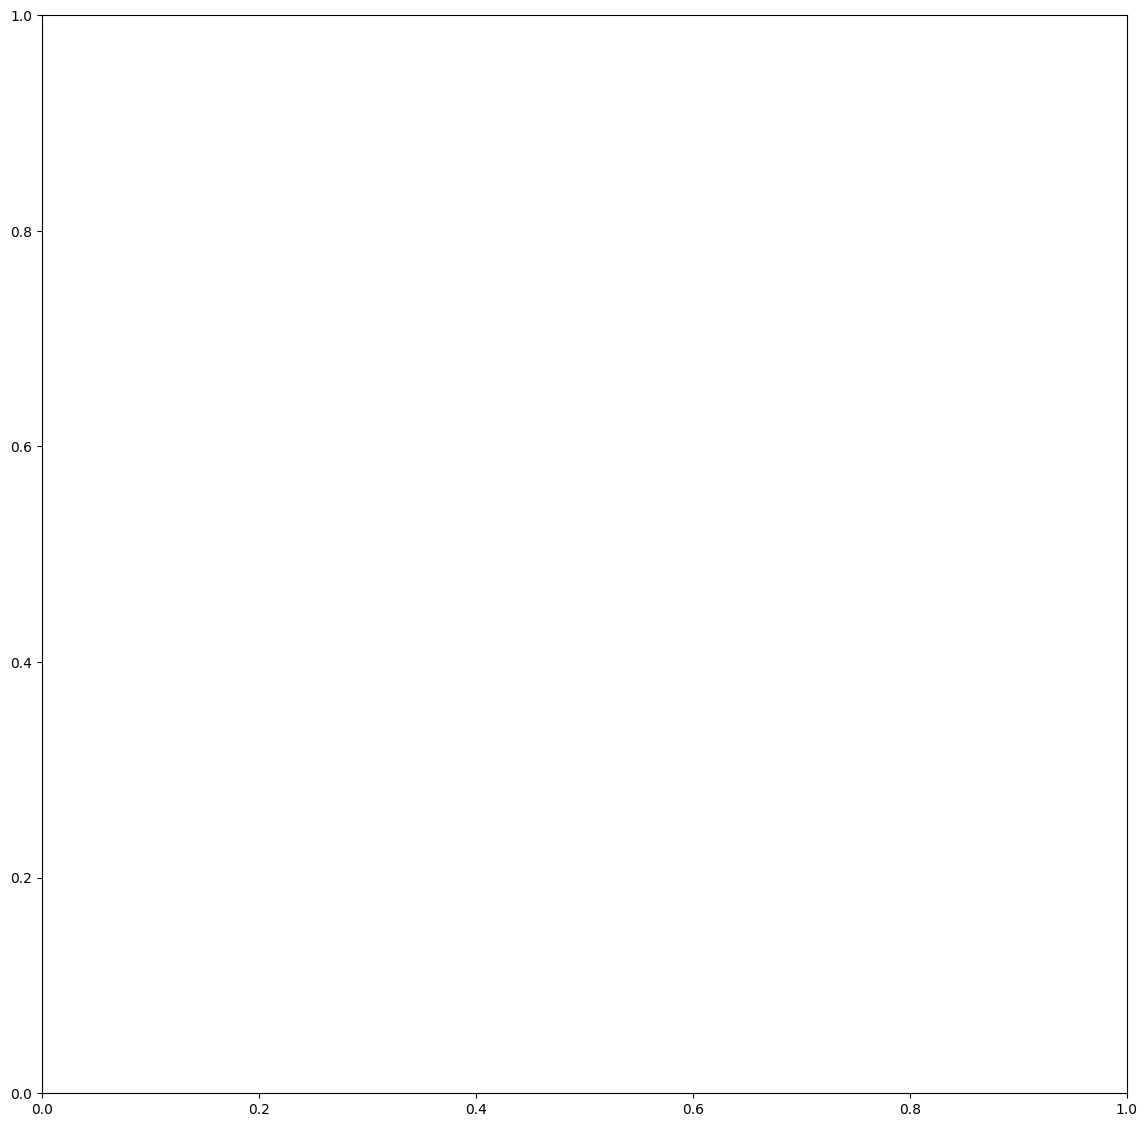

In [4]:
import random
import matplotlib.pyplot as plt
#from Data_visualization import visualize_home_win_season

visualize_home_win_season(dataframe=df_Serie_A_5days)


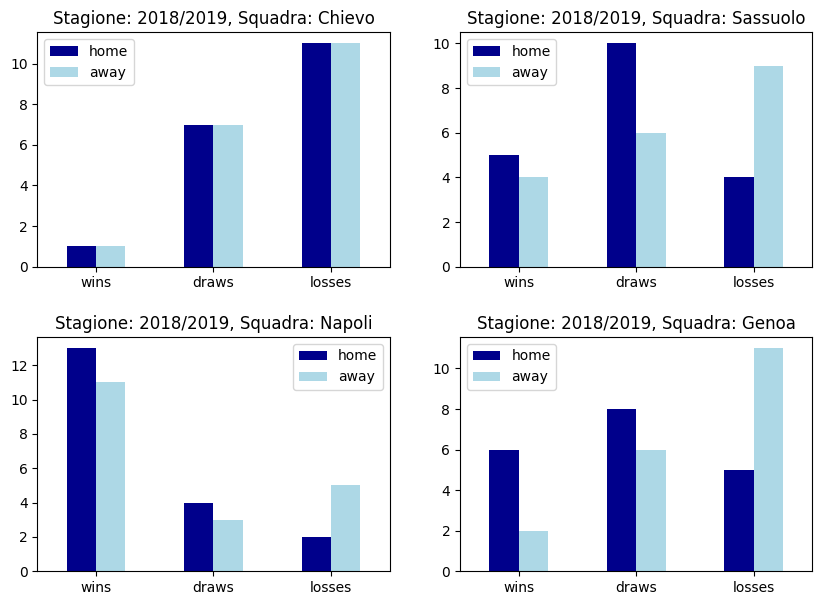

0

In [48]:
def visualize_home_win_season(dataframe, season = 'Random', team='Random'):
    df_win_loss = dataframe[['stagione','hometeam','awayteam','home_result']].reset_index(drop=True)

    if team == 'Random':
        num_plots= 2
        fig, axs = plt.subplots(num_plots, num_plots, figsize=(24, 14))
    else:
        num_plots=1
        

    if season == 'Random':
        stagione = random.choice(df_win_loss['stagione'].unique())
    else:
        stagione = season   
         
    df_win_loss = df_win_loss[df_win_loss['stagione']==stagione]

    for i in range(num_plots):
        for j in range(num_plots):
            if team == 'Random':
                squadra = random.choice(df_win_loss['hometeam'].unique())
            else:
                squadra=team    

            df_squadra_temp = df_win_loss[(df_win_loss['hometeam'] == squadra) | (df_win_loss['awayteam'] == squadra)]
            vittorie={'home':0,'away':0} 
            pareggi={'home':0,'away':0} 
            sconfitte={'home':0,'away':0} 
            for row in df_squadra_temp.itertuples():
                _,_, home_team, away_team, home_result = row
                if home_team == squadra:
                    if home_result == 'W':
                        vittorie['home'] = vittorie['home']+1
                    elif  home_result == 'D':
                        pareggi['home'] = pareggi['home']+1
                    elif home_result == 'L':
                        sconfitte['home'] = sconfitte['home']+1
                else:
                    if home_result == 'L':
                        vittorie['away'] = vittorie['away']+1
                    elif  home_result == 'D':
                        pareggi['away'] = pareggi['away']+1
                    elif home_result == 'W':
                        sconfitte['away'] = sconfitte['away']+1

            statistiche_casa=pd.DataFrame({'wins':vittorie,'draws':pareggi,'losses':sconfitte}).transpose()

            # Aggiungi il subplot corrente
            if team =='Random':
                ax = axs[i, j]
                # Disegna il grafico nel subplot corrente
                statistiche_casa.plot(kind="bar", figsize=(10, 7), ax=ax,  color=['darkblue', 'lightblue'])
                ax.set_title(f'Stagione: {stagione}, Squadra: {squadra}')
                ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
                # Aumenta la distanza verticale tra i subplot
                fig.subplots_adjust(hspace=0.3)    
            else:    
                statistiche_casa.plot(kind="bar", figsize=(10, 7), color=['darkblue', 'lightblue'])
                plt.title(f'Stagione: {stagione}, Squadra: {squadra}')

    plt.show()
    return 0


visualize_home_win_season(dataframe=df_Serie_A_5days)



Vediamo ogni anno in media quante vittorie in casa sono registrate

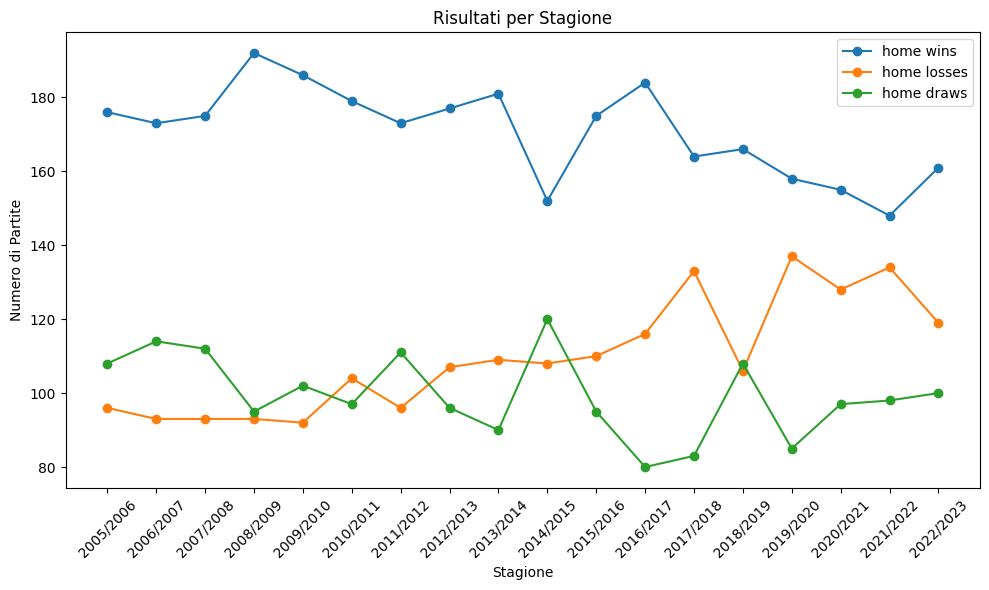

In [65]:
risultati_stag = df_Serie_A_5days[['stagione','home_result']].groupby('stagione')['home_result'].value_counts().unstack()

# # Creazione del plot
plt.figure(figsize=(10, 6))
plt.plot(risultati_stag.index[:-1], risultati_stag['W'][:-1], label='home wins', marker='o')
plt.plot(risultati_stag.index[:-1], risultati_stag['L'][:-1], label='home losses', marker='o')
plt.plot(risultati_stag.index[:-1], risultati_stag['D'][:-1], label='home draws', marker='o')

# Aggiunta di titoli e etichette
plt.title('Risultati per Stagione')
plt.xlabel('Stagione')
plt.ylabel('Numero di Partite')
plt.legend()

# Rotazione degli assi X per migliorare la leggibilità
plt.xticks(rotation=45)

# Mostrare il plot
plt.tight_layout()
plt.show()

E' chiaro che il giocare in casa è vantaggioso

# Vediamo la correlazione fra tiri in porta e gol fatti